# UNSUPERVISED LEARNING

# Dataset:
online_shoppers_intention

# Problem Statement:

Based on given data of visitors browsing for online shopping, build different clusters to know whether person is only browsing and visiting multiples pages or also generating revenue for the shoppers as well.  Analyse and compare the clusters formed with the existing Revenue Column.


In [1]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')
filterwarnings("ignore", category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler 

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

from numpy.linalg import eig

from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
#reading dataset
df1 = pd.read_csv('online_shoppers_intention.csv')

df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
# making copy of the dataset  to keep original as same 

df = df1.copy()

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# checking dimention

df.shape

(12330, 18)

<b>Interpretation:</b> There are 12330 records and 18 features in our dataset

In [5]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [8]:
df.std()

Administrative                3.321784
Administrative_Duration     176.779107
Informational                 1.270156
Informational_Duration      140.749294
ProductRelated               44.475503
ProductRelated_Duration    1913.669288
BounceRates                   0.048488
ExitRates                     0.048597
PageValues                   18.568437
SpecialDay                    0.198917
OperatingSystems              0.911325
Browser                       1.717277
Region                        2.401591
TrafficType                   4.025169
Weekend                       0.422509
Revenue                       0.361676
dtype: float64

In [9]:
df.skew()

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

In [10]:
df.kurt()

Administrative               4.701146
Administrative_Duration     50.556739
Informational               26.932266
Informational_Duration      76.316853
ProductRelated              31.211707
ProductRelated_Duration    137.174164
BounceRates                  7.723159
ExitRates                    4.017035
PageValues                  65.635694
SpecialDay                   9.913659
OperatingSystems            10.456843
Browser                     12.746733
Region                      -0.148680
TrafficType                  3.479711
Weekend                     -0.397404
Revenue                      1.646493
dtype: float64

In [11]:
df_num = df.select_dtypes(include=np.number)
df_num.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4


## Univariate Analysis

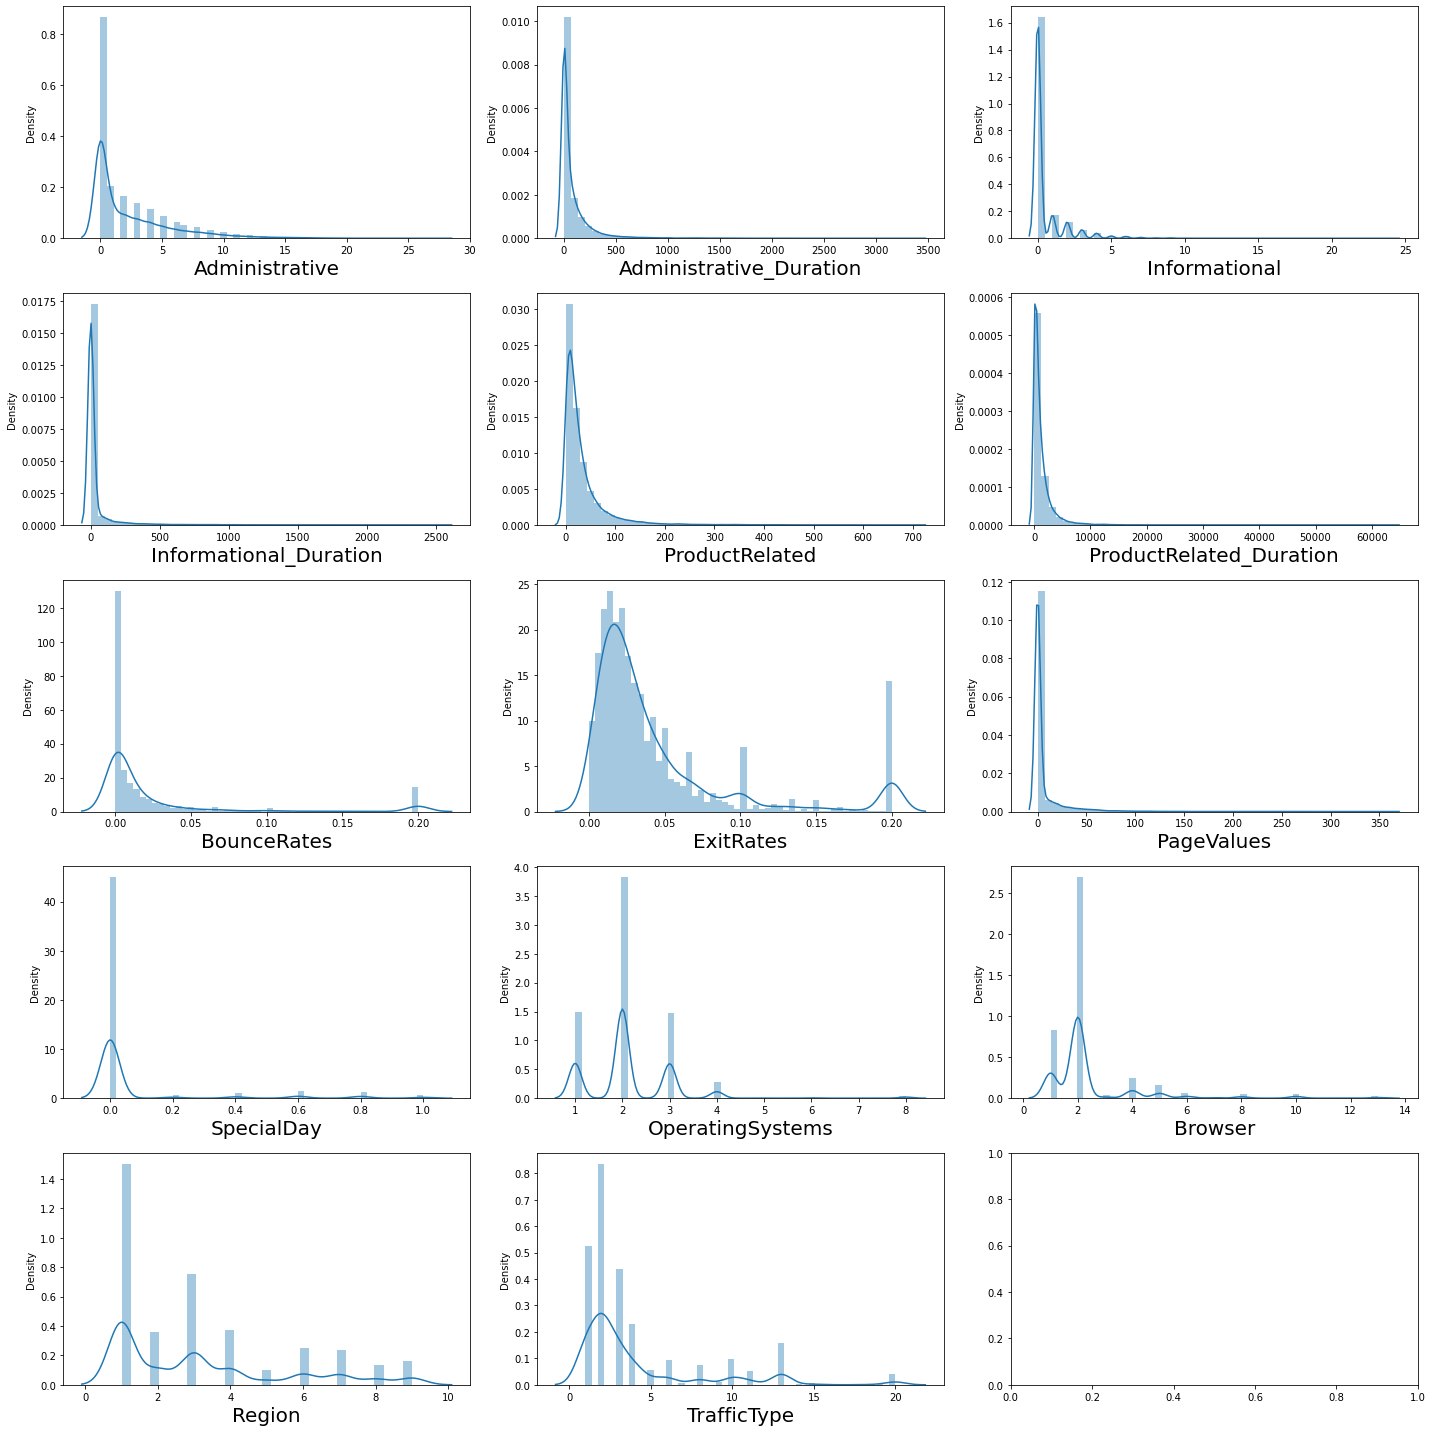

In [12]:
# Plotting density plot with numerical variables.
fig, ax = plt.subplots(5, 3, figsize=(20,20))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.distplot(x = df_num[variable] , ax=subplot) 
    z.set_xlabel(variable, fontsize = 20) 
    
plt.tight_layout()
plt.show()

## Bivariate analysis

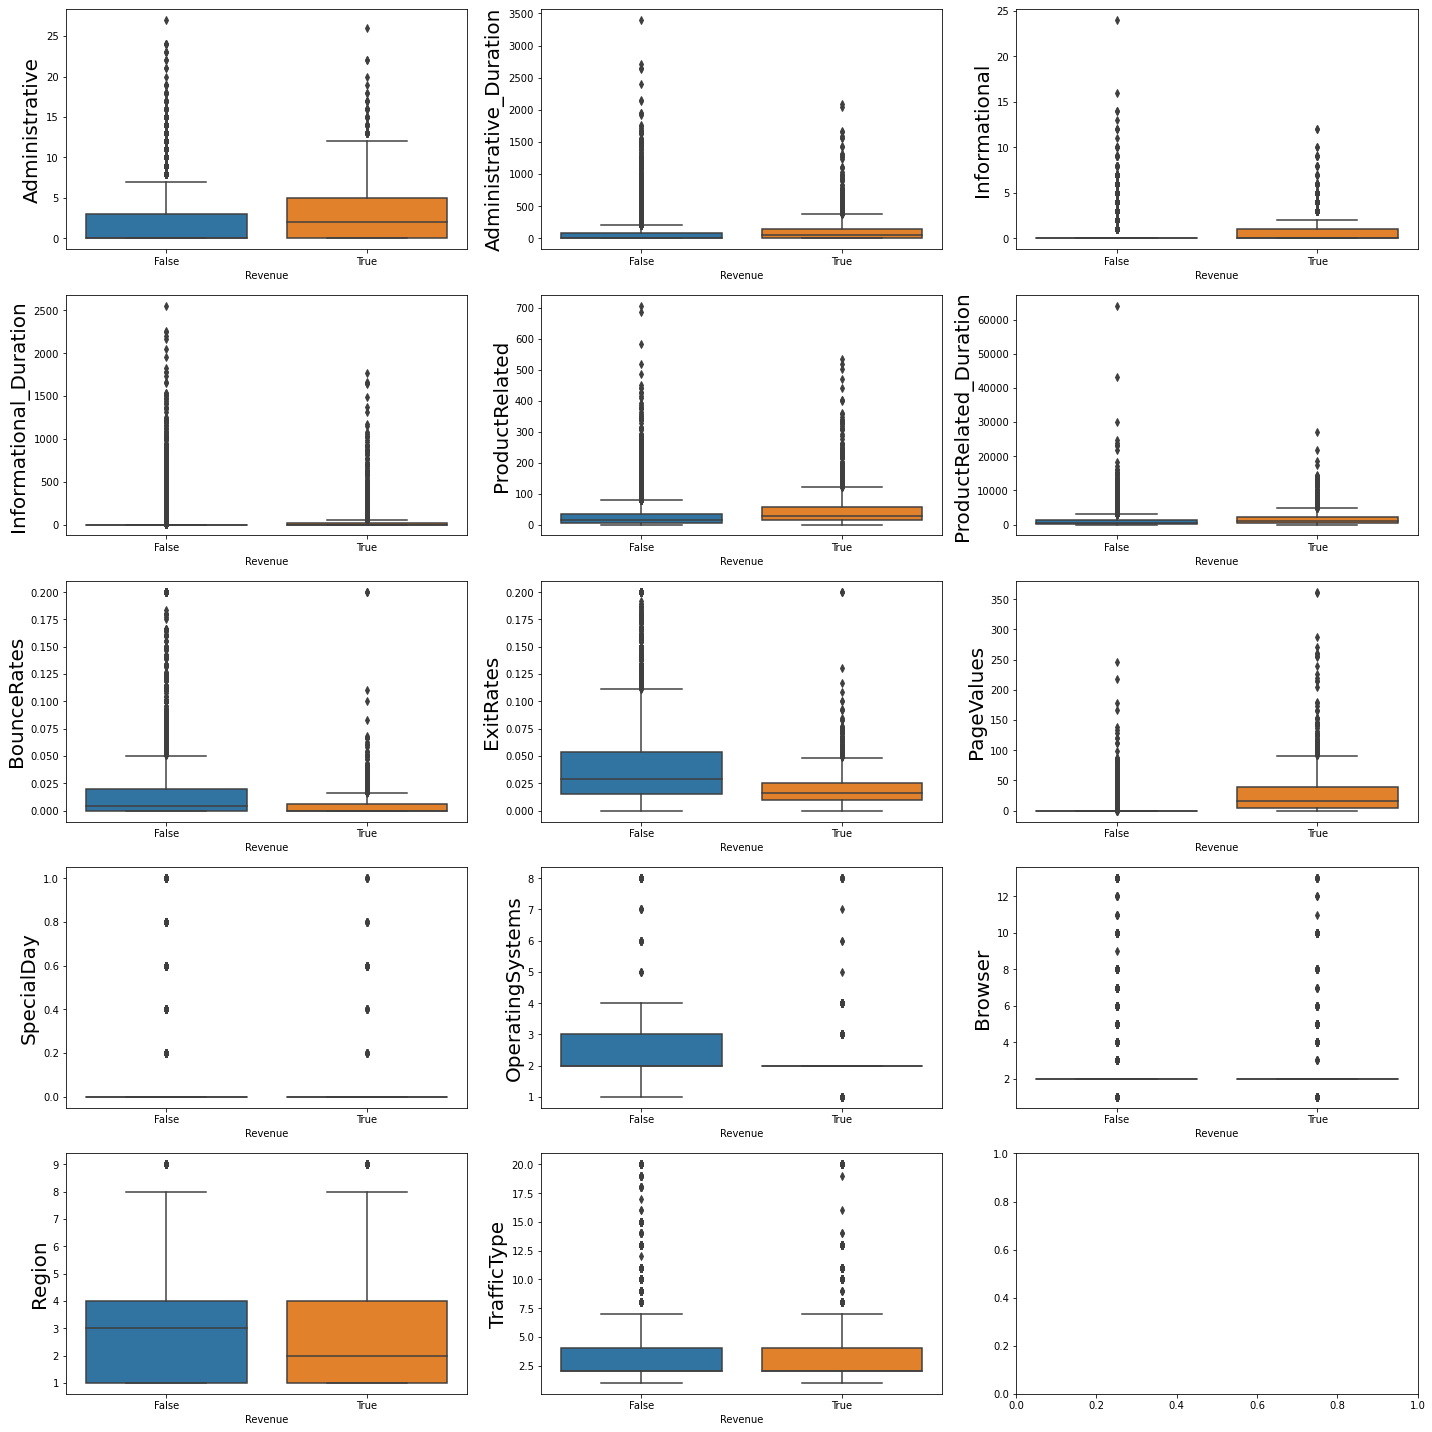

In [13]:
# Plotting density plot with numerical variables.
fig, ax = plt.subplots(5, 3, figsize=(20,20))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = 'Revenue', y = variable, data = df ,ax=subplot) 
    z.set_ylabel(variable, fontsize = 20) 
    
plt.tight_layout()
plt.show()

<b>Interpretation:</b> 
* There are outliers present in almost all variables

## Multivariate analysis

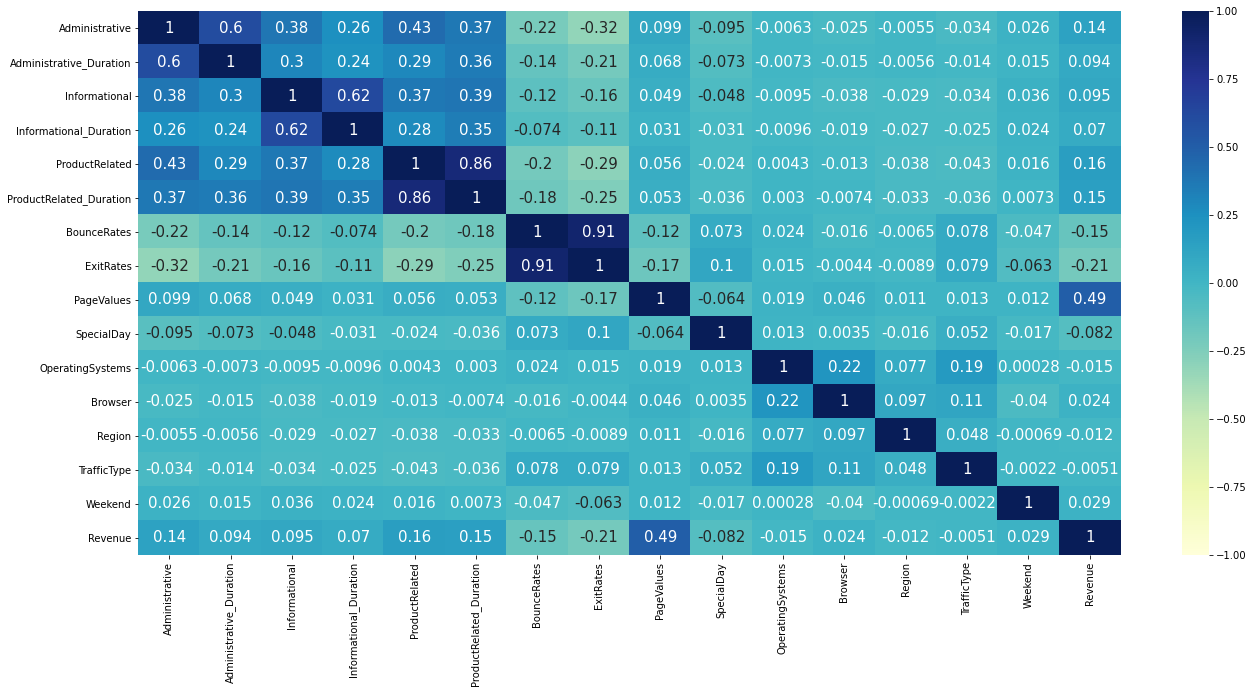

In [14]:
# Plotting heatmap on the numerical variables.
plt.figure(figsize = (22,10))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1,annot_kws={'size':15})
plt.show()

<b>Interpretation:</b> 
* Product Related and Product RelatedDuration have  positive correlation.
* BounceRates and Exitrates have  positive correlation.

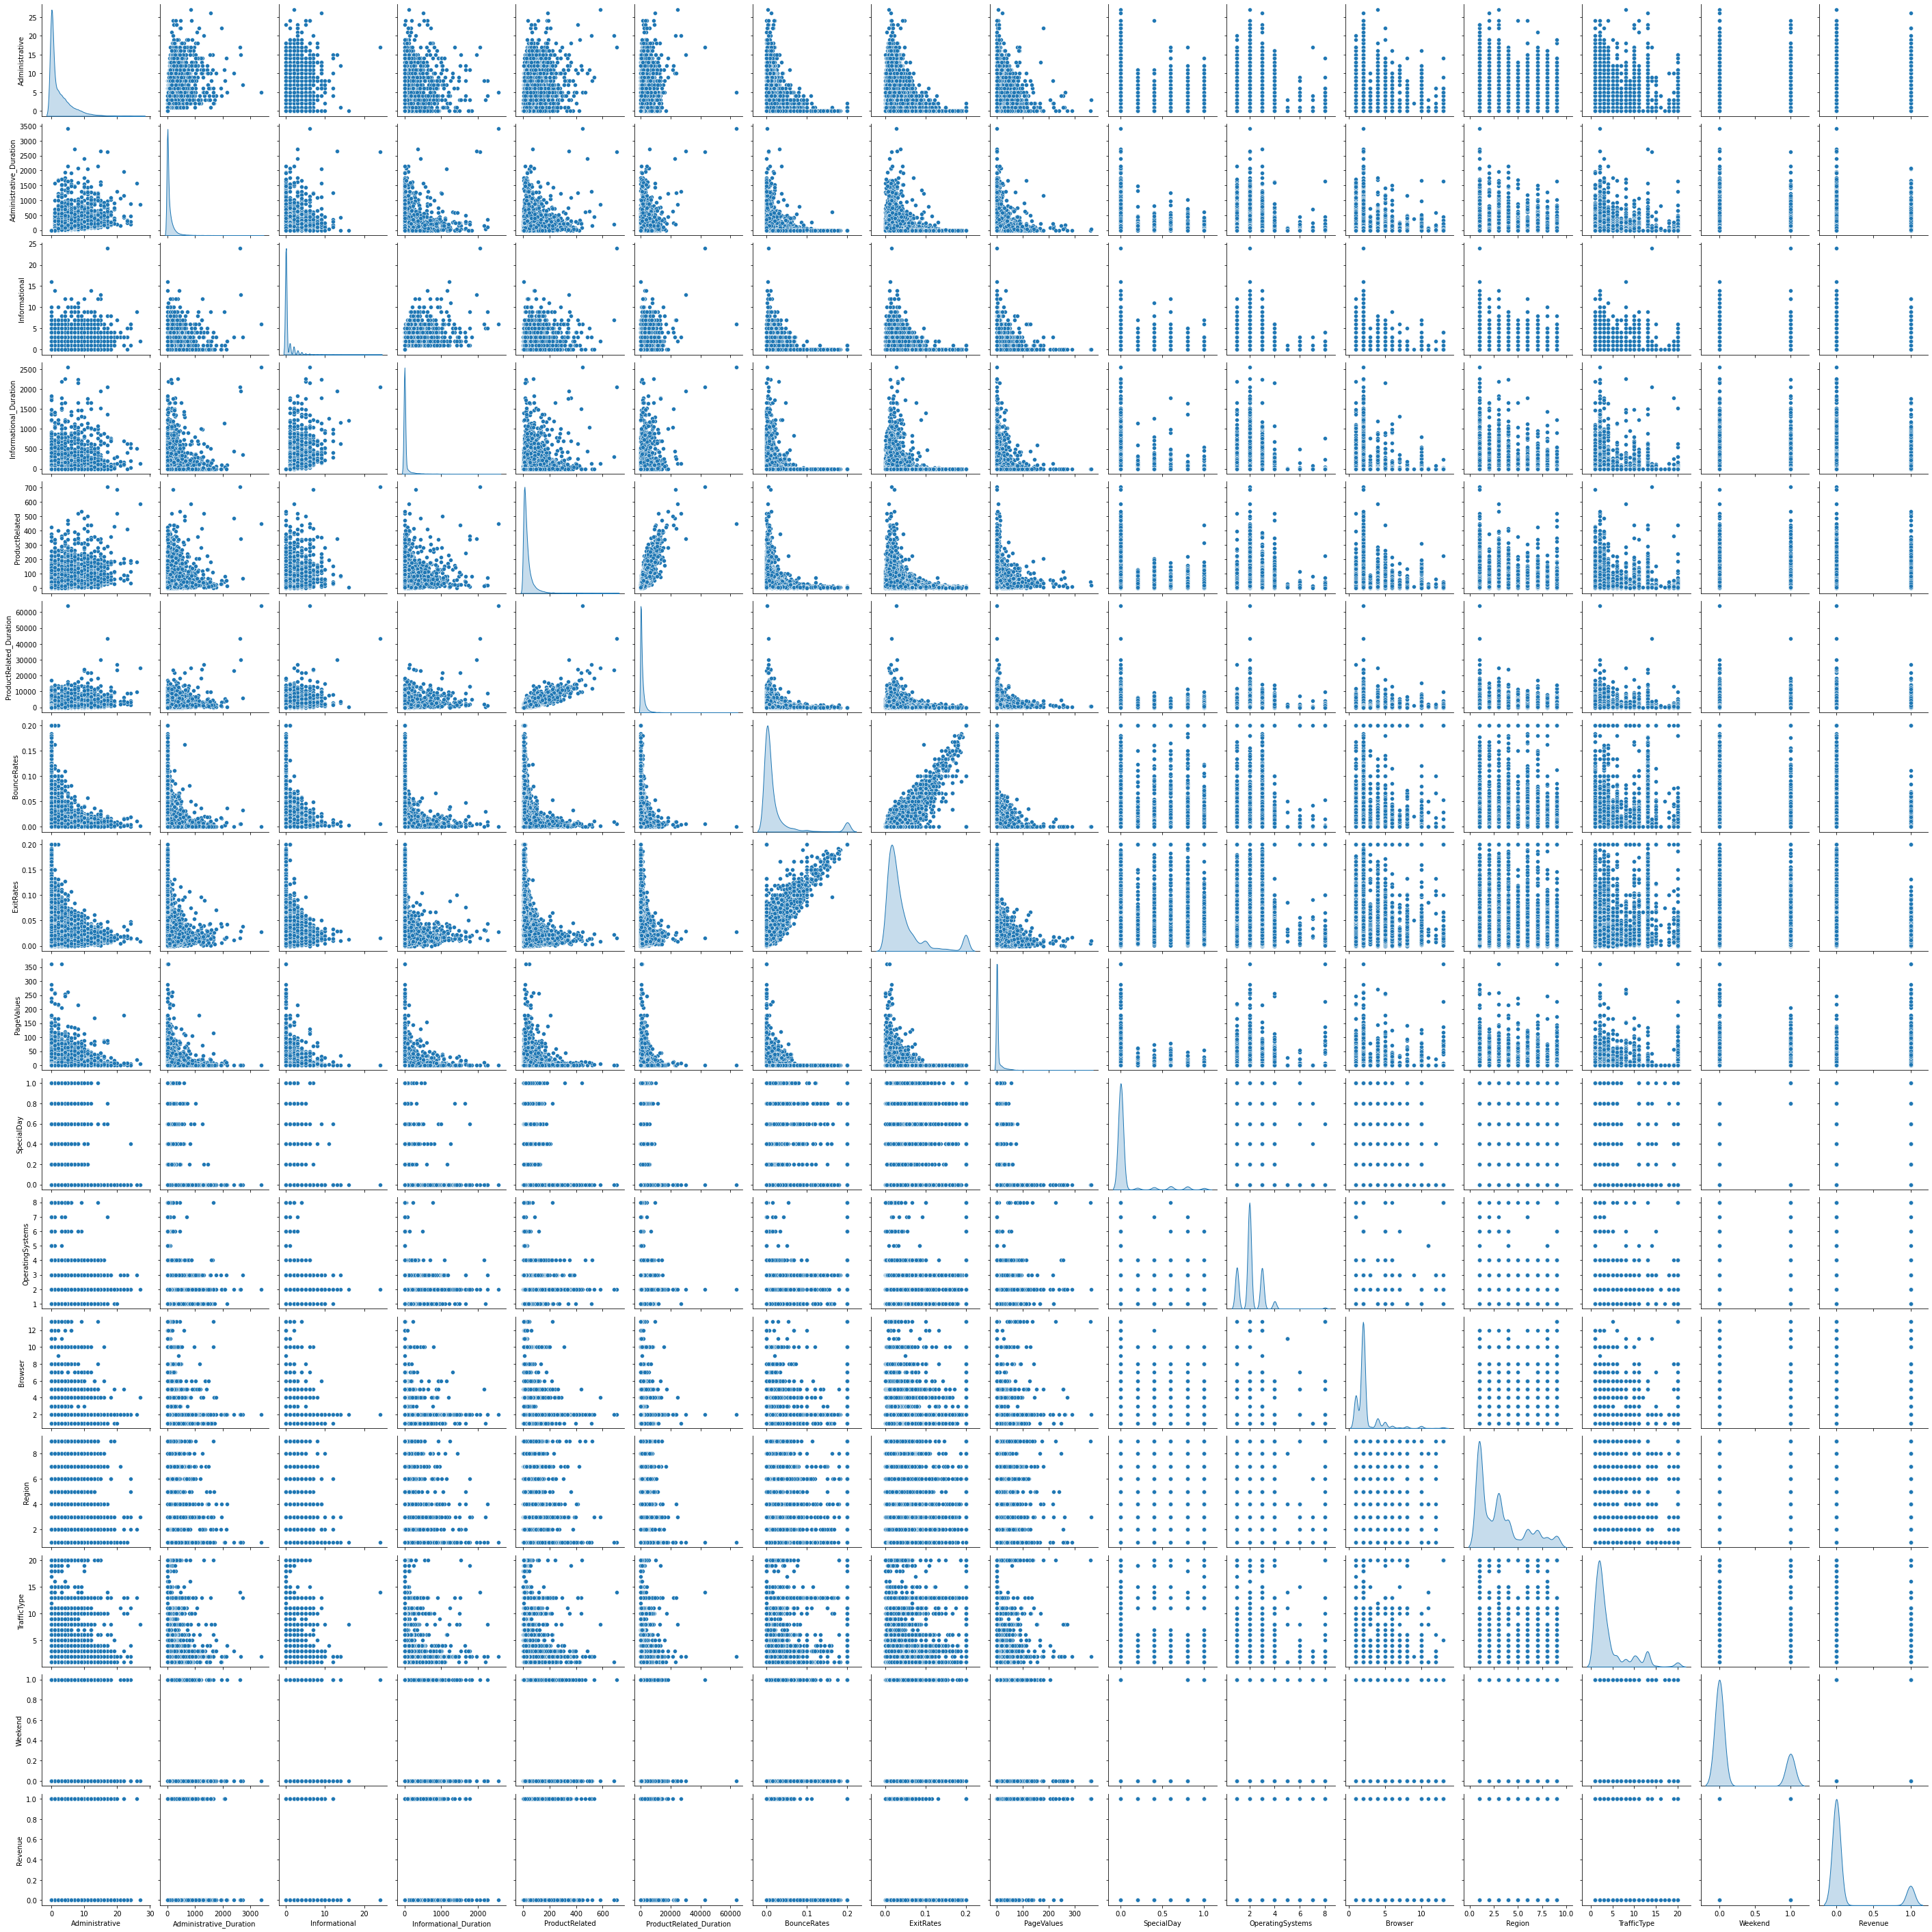

In [15]:
sns.pairplot(df,diag_kind= 'kde');

## Missing values treatment

In [16]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

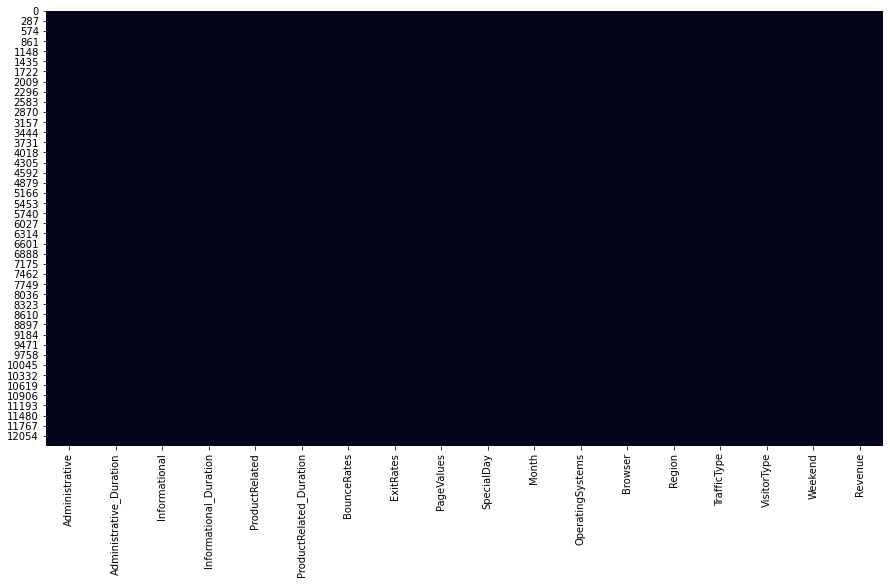

In [17]:
# Visualization of no missing values using heatmap
plt.rcParams["figure.figsize"]=[15,8]
sns.heatmap(df.isnull(), cbar = False)
plt.show()

<b>Interpretation:</b>
* We can infer that, there is neither standard or non-standard missing values in the considered dataset.
* Hence, no missing value treatment is required to be performed.

## Outlier treatment

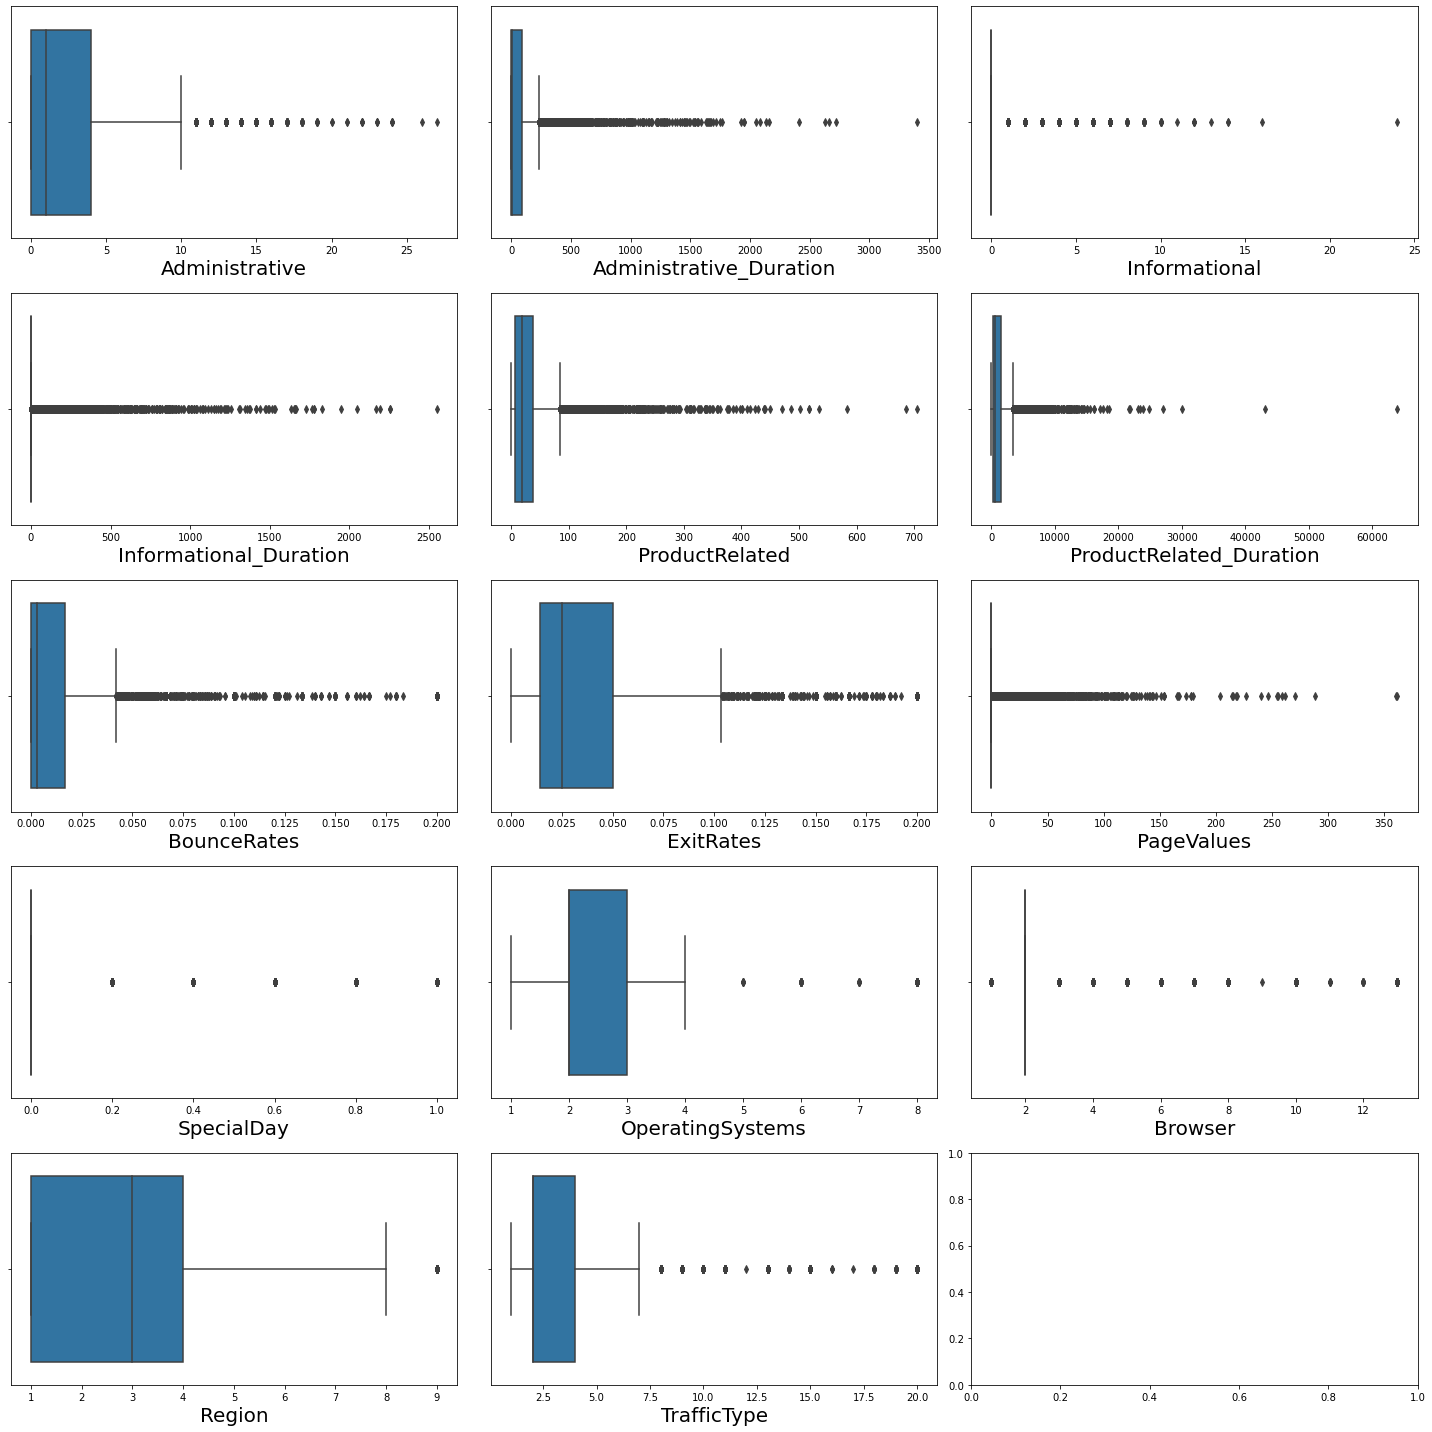

In [18]:
# Visualization of Outliers before treatment.
fig, ax = plt.subplots(5, 3, figsize=(20,20))
for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable] ,ax=subplot) 
    z.set_xlabel(variable, fontsize = 20) 
plt.tight_layout()

<b>Interpretation:</b>
* There are Outliers present in the data
* we will do outlier removal treatment using IQR method

In [19]:
df.shape

(12330, 18)

In [20]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [21]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)

IQR = Q3 - Q1

df_iqr = df[~((df< (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

df_iqr.shape

(2550, 18)

* We can see that almost 80% of the is removed by IQR method 
* So we will individually remove the extreme observations

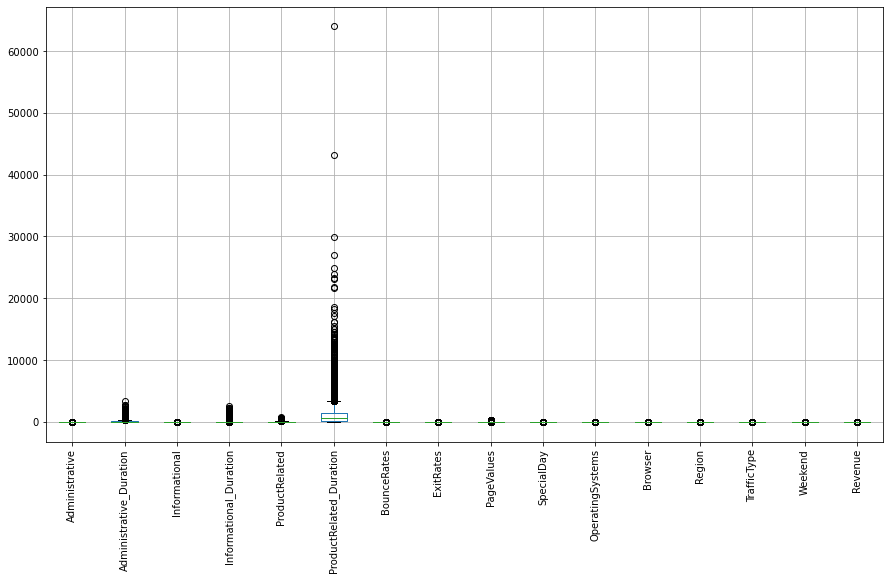

In [23]:
plt.rcParams["figure.figsize"]=[15,8]

df.boxplot()

plt.xticks(rotation = 'vertical')

plt.show()

* 'ProductRelated_Duration' column has most extreme observations , so we can reduce that column values

In [24]:
df = df[df['ProductRelated_Duration']<4000]

df.shape

(11611, 18)

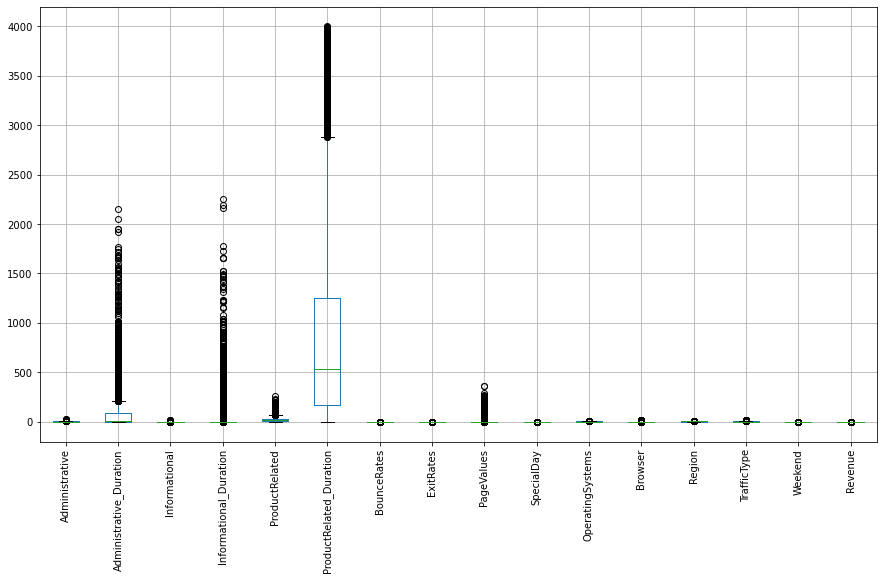

In [25]:
plt.rcParams["figure.figsize"]=[15,8]

df.boxplot()

plt.xticks(rotation = 'vertical')

plt.show()

* Extreme observations has been removed from our dataset

In [28]:
df_num = df.select_dtypes(include = np.number)

df_num.shape

(11611, 14)

## Scaling the data

In [26]:
from sklearn.preprocessing import StandardScaler

In [31]:
df_num.std()

Administrative               3.052238
Administrative_Duration    156.336951
Informational                1.117041
Informational_Duration     116.807933
ProductRelated              25.439852
ProductRelated_Duration    888.251803
BounceRates                  0.049774
ExitRates                    0.049658
PageValues                  18.660266
SpecialDay                   0.199751
OperatingSystems             0.921656
Browser                      1.730511
Region                       2.405955
TrafficType                  4.035269
dtype: float64

In [29]:
X_norm = StandardScaler() 

num_norm = X_norm.fit_transform(df_num)

X = pd.DataFrame(num_norm, columns = df_num.columns)

X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,-0.686353,-0.461144,-0.375191,-0.229926,-0.921531,-0.954022,3.553015,3.132589,-0.313189,-0.311658,-1.218217,-0.785035,-0.900218,-0.767126
1,-0.686353,-0.461144,-0.375191,-0.229926,-0.882221,-0.881967,-0.465332,1.118712,-0.313189,-0.311658,-0.133167,-0.207146,-0.900218,-0.519300
2,-0.686353,-0.461144,-0.375191,-0.229926,-0.921531,-0.954022,3.553015,3.132589,-0.313189,-0.311658,2.036934,-0.785035,2.425008,-0.271475
3,-0.686353,-0.461144,-0.375191,-0.229926,-0.882221,-0.951019,0.539255,1.924263,-0.313189,-0.311658,0.951884,-0.207146,-0.484565,-0.023649
4,-0.686353,-0.461144,-0.375191,-0.229926,-0.567740,-0.247547,-0.063497,0.111773,-0.313189,-0.311658,0.951884,0.370743,-0.900218,-0.023649


# Hierarchical Clustering

### Optimum value of K using Dendrogram method

In [39]:
# instantiate linkage object with scaled data and consider 'ward' linkage method 
link_mat = linkage(X, method = 'ward')     

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat[0:10])

[[0.0000e+00 2.8800e+02 0.0000e+00 2.0000e+00]
 [4.1010e+03 4.3570e+03 0.0000e+00 2.0000e+00]
 [4.7170e+03 1.0215e+04 0.0000e+00 2.0000e+00]
 [5.2300e+02 2.7700e+03 0.0000e+00 2.0000e+00]
 [8.2780e+03 1.1614e+04 0.0000e+00 3.0000e+00]
 [5.6700e+02 1.8590e+03 0.0000e+00 2.0000e+00]
 [3.7970e+03 9.5410e+03 0.0000e+00 2.0000e+00]
 [1.0455e+04 1.1617e+04 0.0000e+00 3.0000e+00]
 [4.7690e+03 8.3860e+03 0.0000e+00 2.0000e+00]
 [4.2670e+03 8.9960e+03 0.0000e+00 2.0000e+00]]


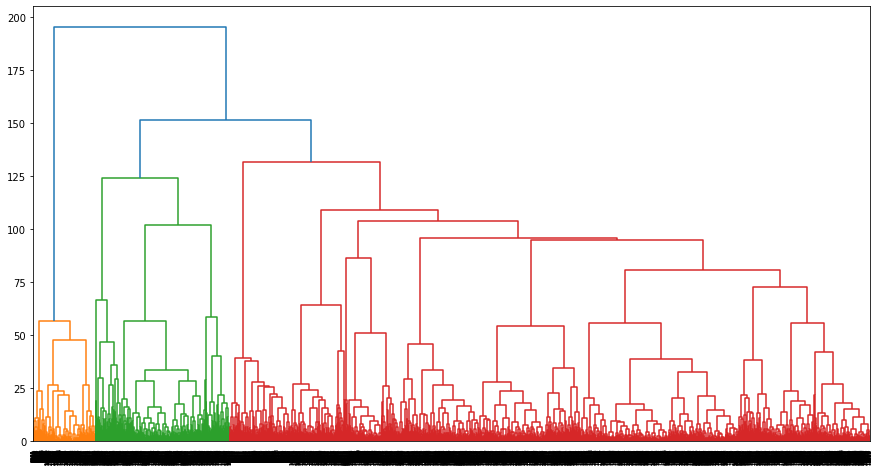

In [40]:
plt.figure(figsize =(15,8))
dendro = dendrogram(link_mat)

### Optimum value of K using silhouette score method

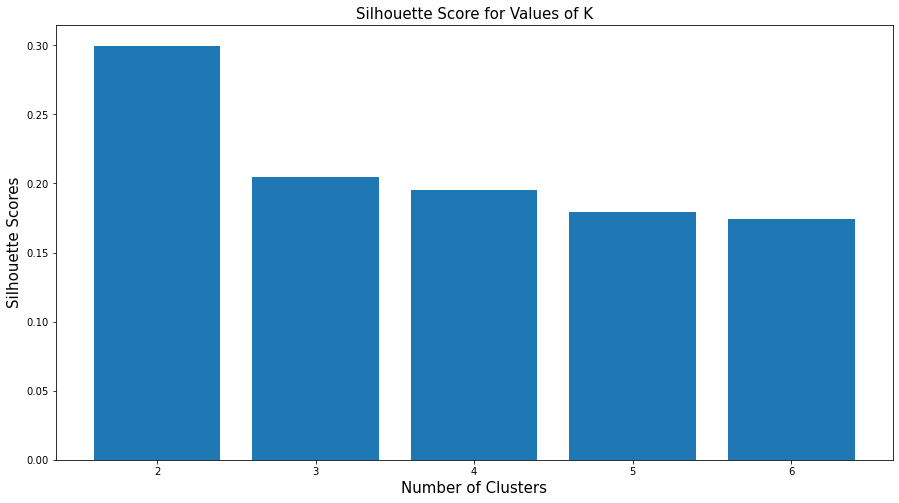

In [38]:
K = [2,3,4,5,6]

silhouette_scores = [] 

for i in K:
    
    model = AgglomerativeClustering(n_clusters = i) 

    silhouette_scores.append(silhouette_score(X, model.fit_predict(X))) 
    
plt.bar(K, silhouette_scores) 

plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)
plt.show()

* From above we can see that the Optimum number of cluster is 2 in  both dendrogram and silhouette score method

### Build the model with two clusters

In [41]:
clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')

clusters.fit(X)

AgglomerativeClustering()

In [52]:
# add a column containing cluster number to the original data
df['Cluster'] = clusters.labels_

# print head() of the newly formed dataframe
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0


In [53]:
df['Cluster'].value_counts()

0    10746
1      865
Name: Cluster, dtype: int64

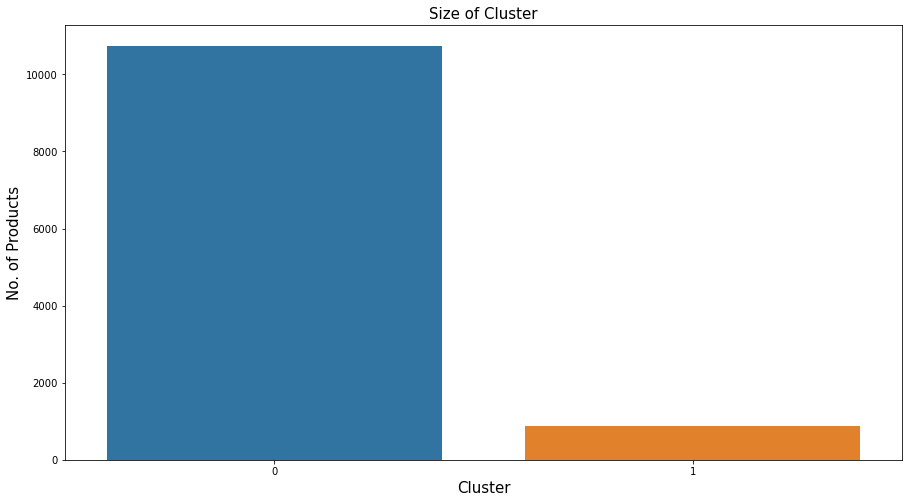

In [54]:
# plot the countplot for the cluster size
sns.countplot(data = df, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Products', fontsize = 15)

# display the plot
plt.show()

In [45]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

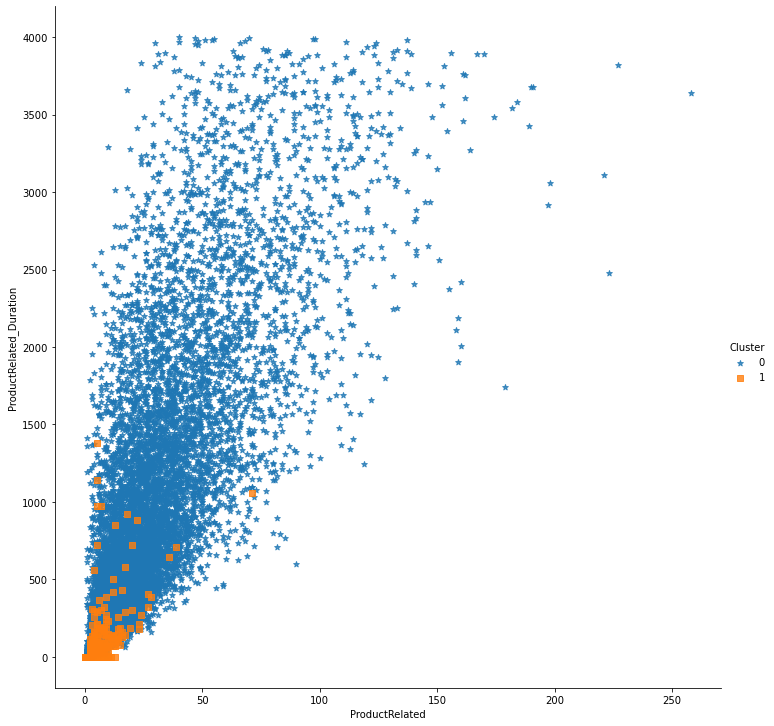

In [55]:
sns.lmplot(x ='ProductRelated', y = 'ProductRelated_Duration', data = df, hue = 'Cluster', 
                markers = ['*', ','], fit_reg = False, size = 10)

# display the plot
plt.show()

## Analysis of Cluster_1

In [56]:
df['Cluster'].value_counts()[0]

10746

In [57]:
df[df.Cluster==0].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Cluster
count,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.0
mean,2.261213,77.888033,0.451703,29.005546,26.183696,912.773344,0.010673,0.033129,6.314347,0.056765,2.124698,2.373255,3.180905,4.015820,0.0
std,3.113156,161.113453,1.154409,121.158471,25.629379,890.955194,0.020494,0.029305,19.320102,0.192307,0.929878,1.752957,2.415483,3.954103,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,8.000000,226.500000,0.000000,0.013333,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.0
50%,1.000000,13.000000,0.000000,0.000000,18.000000,608.858333,0.000000,0.024723,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.0
75%,4.000000,93.575000,0.000000,0.000000,35.000000,1331.562500,0.013333,0.042650,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.0
max,24.000000,2156.166667,16.000000,2252.033333,258.000000,3998.333333,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,0.0


In [59]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
Cluster                      int64
dtype: object

In [60]:
df['Weekend'] = df['Weekend'].astype('object')
df['Revenue'] = df['Revenue'].astype('object')

In [61]:
df[df.Cluster==0].describe(include = object)

,Month,VisitorType,Weekend,Revenue
count,10746,10746,10746,10746
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,2914,9014,8189,9072


**Interpretation:** The above summary shows that the average Revenue in this cluster is False.
Month may is the highest visited month in this cluster. The most visitor in this cluster are Returning visitor

## Analysis of Cluster_2

In [62]:
df['Cluster'].value_counts()[1]

865

In [63]:
df[df.Cluster==1].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Cluster
count,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.0,865.000000,865.000000,865.000000,865.000000,865.000000,865.0
mean,0.027746,0.070135,0.013873,0.152601,2.812717,34.921252,0.178287,0.185092,0.0,0.130405,2.098266,2.174566,2.978035,5.084393,1.0
std,0.184259,1.138308,0.126535,3.660958,4.633271,126.678425,0.045122,0.032525,0.0,0.266863,0.812694,1.410378,2.277248,4.827923,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.059524,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.200000,0.200000,0.0,0.000000,1.000000,2.000000,1.000000,1.000000,1.0
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.200000,0.200000,0.0,0.000000,2.000000,2.000000,2.000000,3.000000,1.0
75%,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.200000,0.200000,0.0,0.000000,3.000000,2.000000,4.000000,9.000000,1.0
max,2.000000,25.000000,2.000000,104.000000,71.000000,1377.250000,0.200000,0.200000,0.0,1.000000,4.000000,10.000000,9.000000,20.000000,1.0


In [64]:
df[df.Cluster==1].describe(include = object)

,Month,VisitorType,Weekend,Revenue
count,865,865,865,865
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,331,830,722,862


**Interpretation:** The above summary shows that the average Revenue in this cluster is False.
Month may is the highest visited month in this cluster. The most visitor in this cluster are Returning visitor

# Principal Component Analysis (PCA)

In [65]:
cov_mat = np.cov(X.T)

print(cov_mat[0:5])

[[ 1.00008613  0.60340936  0.33143986  0.21701362  0.39234893  0.34150695
  -0.22568619 -0.3183218   0.10274369 -0.10247984 -0.01216029 -0.02294037
   0.00792322 -0.03699075 -0.05045928]
 [ 0.60340936  1.00008613  0.24055373  0.15538762  0.21409068  0.25594915
  -0.1495077  -0.2132888   0.07455272 -0.07811634 -0.01252501 -0.01031562
   0.01121004 -0.02095296 -0.03432398]
 [ 0.33143986  0.24055373  1.00008613  0.60935984  0.28108257  0.28247195
  -0.11135316 -0.15604543  0.05365332 -0.04320508 -0.00947111 -0.03860081
  -0.0158892  -0.03706116 -0.02702815]
 [ 0.21701362  0.15538762  0.60935984  1.00008613  0.1782522   0.20236127
  -0.07020769 -0.09968699  0.03949677 -0.03158286 -0.00985392 -0.02233067
  -0.01338524 -0.03399747 -0.01703325]
 [ 0.39234893  0.21409068  0.28108257  0.1782522   1.00008613  0.78648952
  -0.26878445 -0.38031611  0.10432275 -0.01030143  0.00145227 -0.01263827
  -0.01431841 -0.0473336  -0.06334935]]


In [66]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [3.30132085 1.59327192 0.01392164 0.0781103  0.20001542 0.36925236
 0.39934086 1.40647291 1.13777993 1.10974592 0.74768042 0.86333385
 0.90800904 0.97422672 0.96767798] 

Eigenvectors: 
 
 [[ 3.70617925e-01  1.82381757e-01 -2.40194115e-03  4.13494156e-02
   1.97804786e-01  4.57653447e-01  5.69463058e-01  4.96058768e-02
   2.75352997e-01  3.63768473e-01 -2.19593237e-02  6.36470593e-02
   5.15087365e-02 -1.62036952e-01  1.03693379e-01]
 [ 2.93814324e-01  1.94398284e-01  8.44713561e-04  9.89027377e-03
  -1.63626089e-01 -3.10864540e-01 -5.43537454e-01  5.79447765e-02
   3.88594380e-01  4.45355145e-01 -1.95556660e-02  1.12281362e-01
   1.01985954e-01 -2.37463852e-01  1.56385927e-01]
 [ 2.94103338e-01  4.53045186e-01  1.38196438e-03 -4.14731293e-03
   1.36574834e-02 -6.26214549e-01  3.89557483e-01  1.65085277e-02
   4.52602337e-02 -4.00856228e-01  5.64295113e-03 -1.91694197e-02
   1.96159612e-02 -1.82410931e-02  4.93824391e-03]
 [ 2.31772123e-01  4.57347421e-01 -1.91573487e-

In [67]:
# create a list of eigenvalues
eig_val = list(eig_val)

# 'sort(reverse = True)' will sort the eigenvalues in the descending order
eig_val.sort(reverse = True)

# print the sorted list
print(eig_val)

[3.3013208530493134, 1.5932719152658883, 1.4064729145016495, 1.137779926687307, 1.109745918665424, 0.9742267190952055, 0.9676779752575987, 0.9080090384433679, 0.8633338541978637, 0.747680415775042, 0.39934086074194813, 0.3692523648760604, 0.20001541980347956, 0.07811030044645885, 0.013921639706519313]


In [68]:
percent_var = []

for i in eig_val:
    variation = (i/sum(eig_val))*100
    
    percent_var.append(variation)
    
print(percent_var)

[23.46327849655949, 11.323765345043805, 9.996140078398783, 8.08647461909106, 7.887230205454419, 6.924062775602863, 6.877519283678267, 6.453437849493296, 6.135920608214199, 5.313943903861789, 2.838211203249001, 2.6243650521268465, 1.4215575242014198, 0.5551486251729748, 0.09894442985180033]


In [69]:
np.cumsum(percent_var)

array([ 23.4632785 ,  34.78704384,  44.78318392,  52.86965854,
        60.75688874,  67.68095152,  74.5584708 ,  81.01190865,
        87.14782926,  92.46177317,  95.29998437,  97.92434942,
        99.34590694,  99.90105557, 100.        ])

### for 95% variation we shuld select 11 columns

In [70]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA(n_components =11, random_state = 10)

components = pca.fit_transform(X)

In [72]:
df_pca = pd.DataFrame(data = components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11'])

df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-3.816348,2.989437,-1.549514,-0.143048,-1.305873,1.275467,-0.165273,-0.213424,0.382637,0.265094,-0.048374
1,-1.514755,-0.174349,-0.894022,0.355442,0.408767,0.099181,0.525334,-0.578367,0.338411,-0.145647,0.087985
2,-3.904401,2.676453,1.593528,0.329225,-1.070247,0.620907,-2.349149,0.181567,-0.401789,-2.114415,-0.035014
3,-2.267771,0.642925,0.228901,0.240689,0.039366,0.279904,0.347820,-0.675418,0.068774,-0.786590,0.051592
4,-0.930419,-0.500896,0.331702,-0.075553,0.436854,0.159317,0.687200,-1.016867,0.332790,-0.428405,0.196684


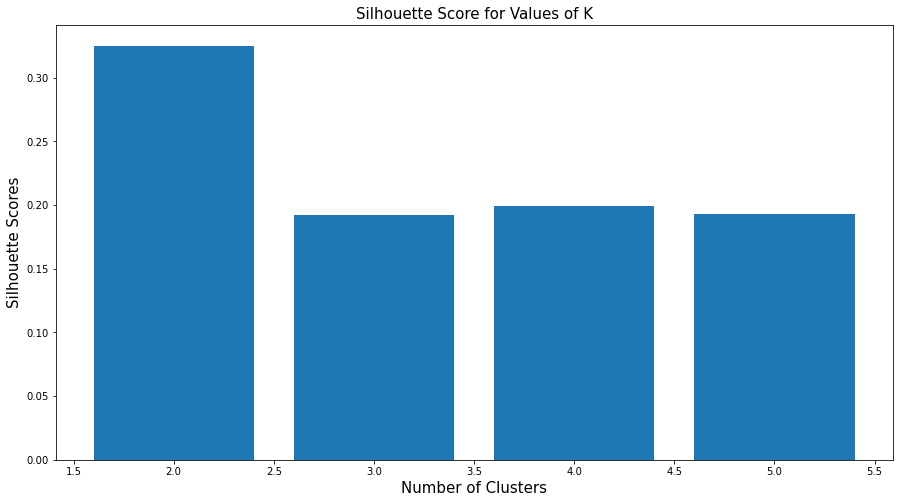

In [73]:
# fininding optimum no of clustes using silhouette score method

K = [2, 3, 4, 5]

silhouette_scores = [] 

for i in K:
    
    model = AgglomerativeClustering(n_clusters = i) 
    
    silhouette_scores.append(silhouette_score(df_pca, model.fit_predict(df_pca))) 
    
plt.bar(K, silhouette_scores) 

plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)

plt.show()

In [74]:
clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')

clusters.fit(df_pca)

AgglomerativeClustering()

In [75]:
df['Cluster_pca'] = clusters.labels_

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster,Cluster_pca
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,1,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,1,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0,0


In [77]:
df['Cluster_pca'].value_counts()

0    10768
1      843
Name: Cluster_pca, dtype: int64

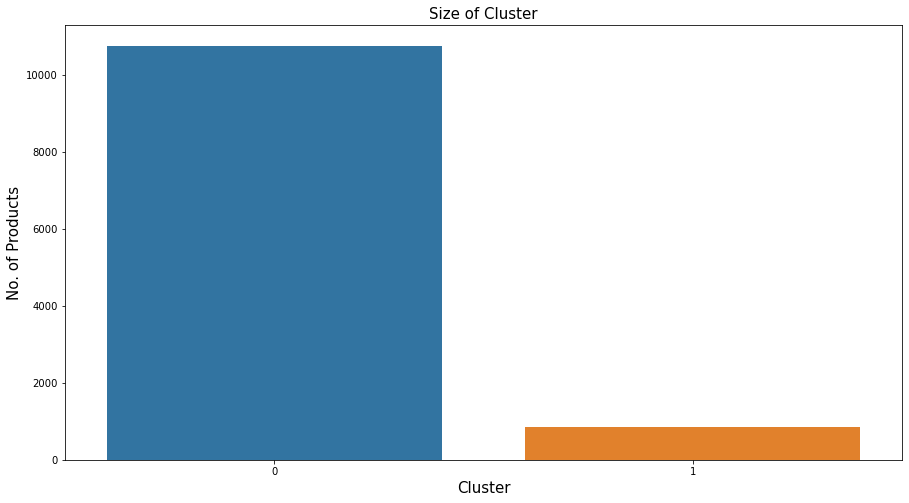

In [78]:
# plot the countplot for the cluster size
sns.countplot(data = df, x = 'Cluster_pca')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Products', fontsize = 15)

# display the plot
plt.show()

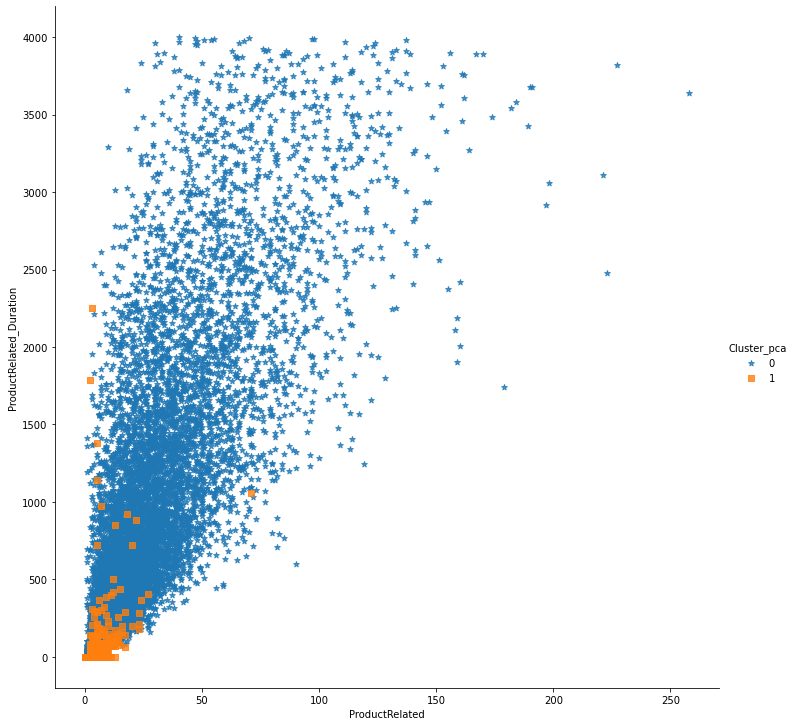

In [79]:
sns.lmplot(x ='ProductRelated', y = 'ProductRelated_Duration', data = df, hue = 'Cluster_pca', 
                markers = ['*', ','], fit_reg = False, size = 10)

# display the plot
plt.show()

## Analysis of Cluster_1

In [83]:
df['Cluster_pca'].value_counts()[0]

10768

In [84]:
df[df.Cluster_pca==0].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Cluster,Cluster_pca
count,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.0
mean,2.256408,77.718313,0.450966,28.955944,26.153232,911.085412,0.010838,0.033277,6.301446,0.056445,2.127600,2.372493,3.180442,4.039004,0.003900,0.0
std,3.111725,160.988557,1.153417,121.043553,25.616411,890.537631,0.020706,0.029463,19.302460,0.192101,0.930414,1.751300,2.413439,3.975401,0.062335,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,8.000000,225.391667,0.000000,0.013333,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.0
50%,1.000000,12.729167,0.000000,0.000000,18.000000,607.544643,0.000000,0.024826,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.0
75%,4.000000,93.168750,0.000000,0.000000,35.000000,1329.363095,0.013333,0.042857,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.0
max,24.000000,2156.166667,16.000000,2252.033333,258.000000,3998.333333,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,0.0


In [85]:
df[df.Cluster_pca==0].describe(include = object)

,Month,VisitorType,Weekend,Revenue
count,10768,10768,10768,10768
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,2915,9036,8202,9094


**Interpretation:** The above summary shows that the average Revenue in this cluster is False.
Month may is the highest visited month in this cluster. The most visitor in this cluster are Returning visitor